In [1]:
import matplotlib.pyplot as plt
from pykowski.karambola import KarambolaResults
import numpy as np
import json
import os
from collections import defaultdict
from matplotlib import pylab
%matplotlib inline

In [2]:
sample_names =["beadpack", "ketton","bentheimer", "estaillades", "doddington","Berea",
                "S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "C1", "C2",
                "Isotropic12", "Isotropic13", "Isotropic14", "Anisotropic121214", "Anisotropic131314"]

In [3]:
minkowski_data = {}
for sample_name in sample_names:
    minkowski_data[sample_name] = {}
    
    json_files = []
    
    for file in os.listdir("minkowski_results/karambola_output/"+sample_name):
        if file.endswith(".json"):
            json_files.append(file)

    dxs = []
    results = []
    for file_name in json_files:
        data = None
        with open("minkowski_results/karambola_output/"+sample_name+"/"+file_name, 'r') as f:
            for row in f:
                data = row
        name = file_name.split("_")
        dx = int(name[0])
        json_data = json.loads(data)
        karam_res = KarambolaResults()
        karam_res.load_from_json_format(json_data)
        #if karam_res.w202 is not 'ERROR' and karam_res.w102 is not 'ERROR':
        try:
            karam_res.compute_eigenvalues()
            dxs.append(dx)
            results.append(karam_res)
        except:
            print "Non-Manifold mesh in "+file_name

    w102s = [x.w102/x.w100 for x in results]
    beta_102s = [x.beta_102 for x in results]
    beta_202s = [x.beta_202 for x in results]
    gamma_102s = [x.gamma_102 for x in results]
    gamma_202s = [x.gamma_202 for x in results]

    dxs_sorted = sorted(dxs)
    w102s_sorted = [x for (y,x) in sorted(zip(dxs, w102s))]
    beta_102s_sorted = [x for (y,x) in sorted(zip(dxs, beta_102s))]
    beta_202s_sorted = [x for (y,x) in sorted(zip(dxs, beta_202s))]
    gamma_102s_sorted = [x for (y,x) in sorted(zip(dxs, gamma_102s))]
    gamma_202s_sorted = [x for (y,x) in sorted(zip(dxs, gamma_202s))]
    minkowski_data[sample_name]["dx"] = dxs_sorted
    minkowski_data[sample_name]["w102"] = w102s_sorted
    minkowski_data[sample_name]["beta_102"] = beta_102s_sorted
    minkowski_data[sample_name]["beta_202"] = beta_202s_sorted
    minkowski_data[sample_name]["gamma_102"] = gamma_102s
    minkowski_data[sample_name]["gamma_202"] = gamma_202s
    
    

C:\Users\lmosser\Anaconda2\lib\site-packages\pykowski-0.1.0-py2.7.egg\pykowski\karambola.py:221: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\lmosser\Anaconda2\lib\site-packages\pykowski-0.1.0-py2.7.egg\pykowski\karambola.py:222: RuntimeWarning: invalid value encountered in double_scalars


In [4]:
permeability_file = "permeability_results/permeability_tensors_edit.json"
with open(permeability_file) as data_file:
    permeability = json.load(data_file)

In [5]:
min_vals = []
mid_vals = []
max_vals = []
names_vals = []
for name in sample_names:
    print name
    tensor = minkowski_data[name]["w102"][-1]
    vals = [tensor[0][0], tensor[1][1], tensor[2][2]]
    #print vals
    perm = np.array([permeability[name]["kx"], permeability[name]["ky"], permeability[name]["kz"]])
    #print "lel", min(perm)
    #print np.where(perm==max(perm))
    #print np.where(vals == max(vals))[0][0]
    #print np.where(perm==min(perm))[0][0]
    max_correlate = False
    min_correlate = False
    mid_correlate = False
    print perm
    print vals
    if name in ["beadpack", "Anisotropic121214", "Anisotropic131314", "Isotropic12", "Isotropic13", "Isotropic14"]:
        #account for isotropic data and isotropy in two planes.checked manually for correctness
        min_correlate=True
        mid_correlate = True
        max_correlate = True
    else:
        if np.where(vals == max(vals))[0] == np.where(perm==min(perm))[0]:
            min_correlate = True
        if np.where(vals == min(vals))[0] == np.where(perm==max(perm))[0]:
            max_correlate = True
        if max_correlate and min_correlate:
            mid_correlate = True
    print min_correlate, mid_correlate, max_correlate
    min_vals.append(min_correlate)
    mid_vals.append(mid_correlate)
    max_vals.append(max_correlate)
    if name == "Isotropic12":
        names_vals.append("Isotropic \ 1")
    elif name == "Isotropic13":
        names_vals.append("Isotropic \ 2")
    elif name == "Isotropic14":
        names_vals.append("Isotropic \ 3")
    elif name == "Anisotropic121214":
        names_vals.append("Anisotropic \ 1")
    elif name == "Anisotropic131314":
        names_vals.append("Anisotropic \ 2")
    else:
        names_vals.append(name)
    #print perm
    print ""
confusion_matrix = np.array([min_vals, mid_vals, max_vals])
print confusion_matrix

beadpack
[  6.10600000e-12   6.24400000e-12   6.11700000e-12]
[0.33317262453147195, 0.33398802554564683, 0.33283934967975065]
True True True

ketton
[  5.03700000e-12   3.41100000e-12   3.21900000e-12]
[0.30629152298216905, 0.32197558159917511, 0.37173289543727073]
True True True

bentheimer
[  2.74300000e-12   2.82900000e-12   2.29900000e-12]
[0.3216613682387387, 0.32064165832636071, 0.35769697314756244]
True True True

estaillades
[  1.54682000e-13   7.36353000e-14   1.15788000e-13]
[0.31556636527846604, 0.32081155202998318, 0.36362208250003913]
False False True

doddington
[  3.09000000e-13   3.04000000e-13   2.65000000e-13]
[0.31318370820177716, 0.31596856003254248, 0.37084773159850493]
True True True

Berea
[  1.36000000e-12   1.30400000e-12   1.19300000e-12]
[0.32064370147450116, 0.33513387759307517, 0.3442224208723616]
True True True

S1
[  1.96900000e-12   1.75200000e-12   1.31200000e-12]
[0.28669862900899346, 0.29462687438042162, 0.41867449661776873]
True True True

S2
[  4.31

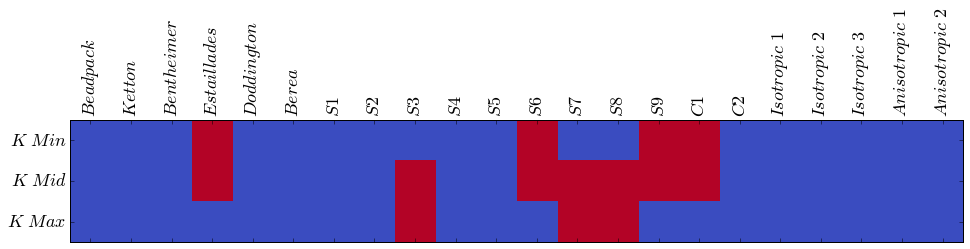

In [7]:
#fig, ax = plt.subplots(figsize=(16,16))
pylab.matshow(confusion_matrix, cmap='coolwarm_r')
pylab.xticks(range(len(names_vals)),[r'$'+name.title()+'$' for name in names_vals], fontsize=18)
pylab.yticks([0, 1, 2], [r"$K \ Min$", r"$K \ Mid$", r"$K \ Max$"], fontsize=18)

for tick in pylab.gca().xaxis.iter_ticks():
    tick[0].label2On = True
    tick[0].label1On = False
    tick[0].label2.set_rotation('vertical')

pylab.savefig("minkowski_results/minkowski_ball_figures/permeability_check.png", bbox_extra_artists=None, bbox_inches='tight', dpi=300)
plt.show()
plt.close()

In [8]:
class Porestats(object):
    def __init__(self, data):
        self.name = data["name"]
        
        self.porosity = data["porosity"]
        self.porosity_sq = self.porosity*self.porosity
        
        #Covariance: C(x) = cov(x)+Vv^2
        self.covariance_x = np.array(data["x"])
        self.covariance_y =  np.array(data["y"])
        self.covariance_z =  np.array(data["z"])
        
        self.covariance_averaged = np.array(data["averaged"])
        
        #Covariance Function: cov(x) = C(x)-Vv^2
        self.covariance_function_x = self.covariance_x-self.porosity_sq
        self.covariance_function_y = self.covariance_y-self.porosity_sq
        self.covariance_function_z = self.covariance_z-self.porosity_sq
        
        self.covariance_function_averaged = self.covariance_averaged-self.porosity_sq
        
        #Normalized Covariance Function: cov(x)/(Vv-Vv^2)
        self.normalized_covariance_x = np.divide(self.covariance_function_x, self.porosity-self.porosity_sq)
        self.normalized_covariance_y = np.divide(self.covariance_function_y, self.porosity-self.porosity_sq)
        self.normalized_covariance_z = np.divide(self.covariance_function_z, self.porosity-self.porosity_sq)
        
        self.normalized_covariance_averaged = np.divide(self.covariance_function_averaged, self.porosity-self.porosity_sq)
        
        self.fit_x = None
        self.fit_y = None
        self.fit_z = None
        
        self.fit_averaged = None
        
        self.poly_x = None
        self.poly_y = None
        self.poly_z = None
        
        self.poly_averaged = None
        
        self.fit_poly()
        
    def fit_poly(self, N=10, res=1):
        self.fit_x = np.polyfit(np.array(range(len(self.covariance_x[0:N])))*res, self.covariance_x[0:N], 1)
        self.poly_x = np.poly1d(self.fit_x)
        
        self.fit_y = np.polyfit(np.array(range(len(self.covariance_y[0:N])))*res, self.covariance_y[0:N], 1)
        self.poly_y = np.poly1d(self.fit_y)
        
        self.fit_z = np.polyfit(np.array(range(len(self.covariance_z[0:N])))*res, self.covariance_z[0:N], 1)
        self.poly_z = np.poly1d(self.fit_z)
        
        self.fit_averaged = np.polyfit(np.array(range(len(self.covariance_averaged[0:N])))*res, self.covariance_averaged[0:N], 1)
        self.poly_averaged = np.poly1d(self.fit_averaged)
        
        self.rc_x = (self.porosity_sq-self.porosity)/self.poly_x[1]
        self.rc_y = (self.porosity_sq-self.porosity)/self.poly_y[1]
        self.rc_z = (self.porosity_sq-self.porosity)/self.poly_z[1]
        
        self.rc_averaged = (self.porosity_sq-self.porosity)/self.poly_averaged[1]
    
    def compute_Sv(self, resolution=1., direc_frac=[1., 1., 1.]):
        self.Sv_i = [-2./direc_frac[0]*self.poly_x[1]*1./resolution, -2./direc_frac[1]*self.poly_y[1]*1./resolution, -2./direc_frac[2]*self.poly_z[1]*1./resolution]
        self.Sv_average = -4*self.poly_averaged[1]*1./resolution
        
    def compute_kozeny_carman_perm(self):
        self.kozeny_i = [(self.porosity**3)/((1-self.porosity)**2)*1./(val**2) for val in self.Sv_i]
        self.kozeny_average = (self.porosity**3)/((1-self.porosity)**2)*1./(self.Sv_average**2) 
        
    def compute_kozeny_constant(self, permeability):
        self.kozeny_c_i = [kozeny/perm for kozeny, perm in zip(self.kozeny_i, permeability)]
        self.kozeny_c_average = self.kozeny_average/np.mean(permeability)

In [9]:
covariance_results_dir = "covariance_results/"
porestats_objs = {}

for file in os.listdir(covariance_results_dir):
        if file.endswith(".json"):
            with open(covariance_results_dir+file) as data_file:
                data = json.load(data_file)
                porestats_objs[data["name"]] = Porestats(data)

In [10]:
min_vals = []
mid_vals = []
max_vals = []
names_vals = []
for name in sample_names:
    print name
    cov = porestats_objs[name]
    vals = [cov.rc_x, cov.rc_y, cov.rc_z]
    #print vals
    perm = np.array([permeability[name]["kx"], permeability[name]["ky"], permeability[name]["kz"]])

    max_correlate = False
    min_correlate = False
    mid_correlate = False
    print perm
    print vals
    if name in ["beadpack", "Anisotropic121214", "Anisotropic131314", "Isotropic12", "Isotropic13", "Isotropic14"]:
        #account for isotropic data and isotropy in two planes.checked manually for correctness
        min_correlate=True
        mid_correlate = True
        max_correlate = True
    else:
        if np.where(vals == max(vals))[0] == np.where(perm==max(perm))[0]:
            max_correlate = True
        if np.where(vals == min(vals))[0] == np.where(perm==min(perm))[0]:
            min_correlate = True
        if max_correlate and min_correlate:
            mid_correlate = True
    print min_correlate, mid_correlate, max_correlate
    min_vals.append(min_correlate)
    mid_vals.append(mid_correlate)
    max_vals.append(max_correlate)
    if name == "Isotropic12":
        names_vals.append("Isotropic \ 1")
    elif name == "Isotropic13":
        names_vals.append("Isotropic \ 2")
    elif name == "Isotropic14":
        names_vals.append("Isotropic \ 3")
    elif name == "Anisotropic121214":
        names_vals.append("Anisotropic \ 1")
    elif name == "Anisotropic131314":
        names_vals.append("Anisotropic \ 2")
    else:
        names_vals.append(name)
    #print perm
    print ""
confusion_matrix = np.array([min_vals, mid_vals, max_vals])
print confusion_matrix

beadpack
[  6.10600000e-12   6.24400000e-12   6.11700000e-12]
[14.987406848422117, 14.96725240535592, 15.140973420618902]
True True True

ketton
[  5.03700000e-12   3.41100000e-12   3.21900000e-12]
[18.534776700481441, 17.92064191657866, 16.417663020040099]
True True True

bentheimer
[  2.74300000e-12   2.82900000e-12   2.29900000e-12]
[12.428918164675355, 12.463312573275616, 11.988567349731186]
True True True

estaillades
[  1.54682000e-13   7.36353000e-14   1.15788000e-13]
[14.269551760558487, 14.025233592351213, 14.093260968178257]
True True True

doddington
[  3.09000000e-13   3.04000000e-13   2.65000000e-13]
[15.101945973665265, 14.742833556394418, 13.875189285308151]
True True True

Berea
[  1.36000000e-12   1.30400000e-12   1.19300000e-12]
[11.834734507274634, 11.590711822841254, 11.829118154246798]
False False True

S1
[  1.96900000e-12   1.75200000e-12   1.31200000e-12]
[12.426790452315775, 12.173285914249606, 11.813998627869299]
True True True

S2
[  4.31800000e-12   3.983000

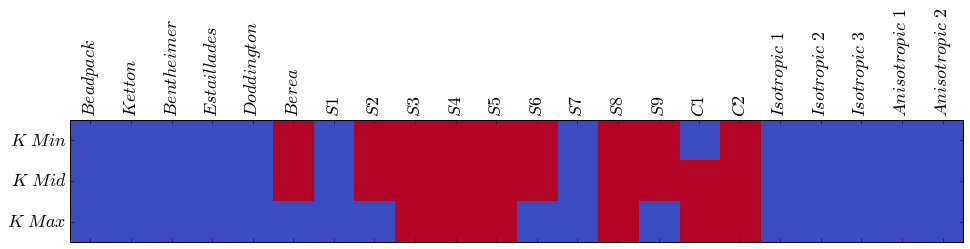

In [11]:
#fig, ax = plt.subplots(figsize=(16,16))
pylab.matshow(confusion_matrix, cmap='coolwarm_r')
pylab.xticks(range(len(names_vals)),[r'$'+name.title()+'$' for name in names_vals], fontsize=18)
pylab.yticks([0, 1, 2], [r"$K \ Min$", r"$K \ Mid$", r"$K \ Max$"], fontsize=18)

for tick in pylab.gca().xaxis.iter_ticks():
    tick[0].label2On = True
    tick[0].label1On = False
    tick[0].label2.set_rotation('vertical')

pylab.savefig("minkowski_results/minkowski_ball_figures/cov_permeability_check.png", bbox_extra_artists=None, bbox_inches='tight', dpi=300)
plt.show()
plt.close()